<a href="https://colab.research.google.com/github/giriharan007/Simple-NN-Using-PyTorch-/blob/main/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #allows the data move forward


In [2]:
#create a model class that inherits nn.module
class Model(nn.Module):
  #input layer (4 feature of the flower=4)
  #hidden layer_1((number of neuron)
  #hidden layer_2(number of neuron)
  #output layer(3 neuron)
    def __init__(self,input=4,h1=8,h2=9,output=3):
        super().__init__() #instantiate our nn.Module
        self.fc1=nn.Linear(input,h1) #fc=fully connected
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,output)
  #create a function move everything forward from oone neuron to another
    def forward(self,x):
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.out(x)

      return x

In [5]:
#pick a manual seed for randomization
torch.manual_seed(32)
#create an instance of model
model=Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df=pd.read_csv(url)


In [8]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#replace the string to integer
my_df["species"]=my_df["species"].map({"setosa":0,"versicolor":1,"virginica":2})

In [10]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#train test split
X=my_df.drop("species",axis=1)
y=my_df["species"]

In [12]:
import numpy as np
X=np.array(X)
y=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [15]:

#convert x features a to Tensor

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)


In [16]:
#convert y lables a to LongTensor.Why Longtensor are 64 bit int
Y_train=torch.LongTensor(Y_train)
Y_test=torch.LongTensor(Y_test)

In [17]:
#set the criterion of model to measure the error
criterion=nn.CrossEntropyLoss()
#choose adam optimizer,learning rate=if error doesn't go down after the bunch of iteration(epochs),lower the lr
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:

model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
#train the model
epochs=100
losses=[]
for i in range(epochs):
  #go forward predici
  y_pred=model.forward(X_train)
  #measure the loss
  loss=criterion(y_pred,Y_train)#pred values vs y_train
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10==0:
    print(f"epoch: {i} and loss {loss}")

 #back propagation: take the error of forward propagation and feed it back
 #through the network to fine tune the weights
  optimizer.zero_grad() # set the gradients to zero before starting to do backpropagation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes.
  loss.backward() # Back Propagation
  optimizer.step() # Gradient Descent


epoch: 0 and loss 1.169895887374878
epoch: 10 and loss 0.9578844308853149
epoch: 20 and loss 0.7988812923431396
epoch: 30 and loss 0.634953498840332
epoch: 40 and loss 0.44043001532554626
epoch: 50 and loss 0.291716992855072
epoch: 60 and loss 0.17829042673110962
epoch: 70 and loss 0.11587586998939514
epoch: 80 and loss 0.08928147703409195
epoch: 90 and loss 0.07743765413761139


Text(0.5, 0, 'epochs')

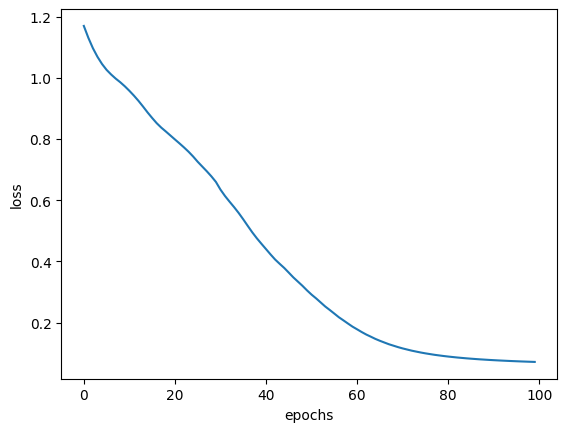

In [20]:
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel("epochs")

In [21]:
#EVALUATE THE MODEL
with torch.no_grad(): #turn off back propagation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, Y_test)

In [22]:
loss

tensor(0.0539)

In [30]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test): #enumerate is used to count the no.of iteration (https://www.geeksforgeeks.org/enumerate-in-python/)
    y_val=model.forward(data)

    print(f"{i+1}.)n {str(y_val)} \t {(Y_test[i])} \t {(y_val.argmax().item())}")

    #correct or not
    if y_val.argmax().item() == Y_test[i]: #(y_val.argmax().item() it tell the prediction output) and(y_test[i] it tell the actual output)
      correct+=i
print(f"we got {correct} correct!")


1.)n tensor([-3.3580,  3.9452,  0.3616]) 	 1 	 1
2.)n tensor([  7.5862,   1.1113, -11.3861]) 	 0 	 0
3.)n tensor([  6.6288,   1.5092, -10.4603]) 	 0 	 0
4.)n tensor([-3.3304,  4.2647,  0.0569]) 	 1 	 1
5.)n tensor([-7.3705,  2.8135,  5.1481]) 	 2 	 2
6.)n tensor([-7.3749,  3.9061,  4.2781]) 	 2 	 2
7.)n tensor([  6.2304,   1.6527, -10.0543]) 	 0 	 0
8.)n tensor([  6.8783,   1.4056, -10.7016]) 	 0 	 0
9.)n tensor([-2.6728,  4.3138, -0.6444]) 	 1 	 1
10.)n tensor([  7.2201,   1.3890, -11.1494]) 	 0 	 0
11.)n tensor([-3.8269,  4.4110,  0.5165]) 	 1 	 1
12.)n tensor([-8.6886,  1.9990,  6.9012]) 	 2 	 2
13.)n tensor([-2.0605,  3.8275, -0.7672]) 	 1 	 1
14.)n tensor([-1.0676,  4.3809, -2.2975]) 	 1 	 1
15.)n tensor([-7.5000,  2.6230,  5.3318]) 	 2 	 2
16.)n tensor([-8.6214,  1.5491,  7.1280]) 	 2 	 2
17.)n tensor([-3.7724,  3.6503,  0.9422]) 	 1 	 1
18.)n tensor([-6.7624,  2.7791,  4.5289]) 	 2 	 2
19.)n tensor([-1.6978,  4.2047, -1.4772]) 	 1 	 1
20.)n tensor([  7.8104,   1.3824, -11.9435])

In [31]:
#new data
new_iris=torch.tensor([4.7,3.2,1.3,2.0])

In [32]:
with torch.no_grad():
  print(model(new_iris)) #the largest index is the ans

tensor([ 2.3532,  2.3926, -5.0053])


In [33]:
#save  the model
torch.save(model.state_dict(),"iris.pt")


In [34]:
#load the model
new_model=Model()
new_model.load_state_dict(torch.load("iris.pt"))

<All keys matched successfully>

In [35]:
#make sure it loaded successfully
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)